## 데이터셋
- 고객 성격 분석 : https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis

In [ ]:
import pandas as pd

In [ ]:
customers = pd.read_csv('marketing_campaign.csv', sep='\t', index_col='ID')
customers

## .agg()
- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.agg.html
- https://pandas.pydata.org/docs/reference/api/pandas.Series.agg.html

지정된 축(axis)을 기준으로 하나 이상의 연산을 사용하여 **데이터를 집계(aggregate)** 하는 기능을 제공

### parameter
- `func` : function, str, list or dict
    - 데이터를 집계하는 데 사용할 함수를 지정. 
    - 함수로는 DataFrame을 인자로 받을 수 있는 함수나 DataFrame의 apply() 메소드에 사용할 수 있는 함수여야 한다.
    - 허용 가능한 조합
        - 함수
        - 함수 이름의 문자열
        - 함수나 함수 이름이 포함된 리스트
        - 축 레이블과 함수 또는 함수 이름이 포함된 딕셔너리 형태의 조합  
- `axis` : {0 or ‘index}
    - 데이터를 집계할 축을 지정. 
    - 0 또는 'index'인 경우 각 열(column)을 기준으로 함수를 적용.
    - 1 또는 'columns'인 경우 각 행(row)을 기준으로 함수를 적용.
- `*args`와 `**kwargs`: 함수에 전달할 위치 인자와 키워드 인자를 지정할 수 있다.

### return
scalar, Series or DataFrame
- Scalar: Series.agg() 메소드가 단일 함수로 호출될 때 반환됩니다.
- Series: DataFrame.agg() 메소드가 단일 함수로 호출될 때 반환됩니다.
- DataFrame: DataFrame.agg() 메소드가 여러 함수로 호출될 때 반환됩니다.

In [ ]:
# 방법1. dict로 전달
# Income -> max, Kidhome -> mean


In [ ]:
# Income -> [min, max, std], Kidhome -> ['min', 'max', 'mean']


In [ ]:
# 방법2. dict없이 str 또는 list로 전달하기


In [ ]:
# max, min


In [ ]:
# max, min, mean


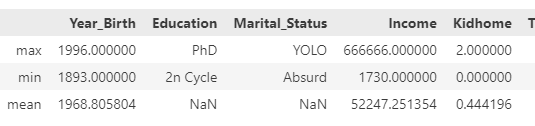

```
FutureWarning: ['Education', 'Marital_Status', 'Dt_Customer'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  customers.agg(['max', 'min', 'mean'])
```

- customers 데이터프레임의 `['Education', 'Marital_Status', 'Dt_Customer']` 열에 숫자형이 아닌 데이터가 포함되어 있기 때문에 에러가 발생.
- 이를 방지하기 위해 이러한 열을 집계 연산에서 제외하거나, 원본에서 해당 열을 삭제.

In [ ]:
# 대처 1 : drop() agg() 체인형으로 해결


In [ ]:
# 대처 2 : 새로운 df를 만들어 해결


In [ ]:
# 대처 3 : 원본에서 제거. 대처1을 파괴적으로 처리하는 방법


## 주의 : agg()는 numeric_only=True가 안된다.

간혹 숫자형 데이터만 집계하기위해 agg()에 numeric_only=True쓰는 경우가 있는데 무의미한 코드이다. 생각보다 쉽게 보이는 코드 실수.

In [ ]:
# 초기화
customers = pd.read_csv('marketing_campaign.csv', sep='\t', index_col='ID')

In [ ]:
customers.agg(['max', 'min', 'mean'], numeric_only=True)

-  numeric_only=True는 agg() 메소드에는 적용되지 않는 옵션
-  numeric_only=True 옵션은 max(), min(), mean() 등과 같은 집계 함수에 적용될 때 사용
- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.max.html